# Ejemplo: error en la interpolación y elección de la partición de puntos

Vamos a ver (no calcular teóricamente) cuál es el error en la interpolación usando los métodos de Lagrange y de Newton, y vamos a analizar cómo depende de la partición de puntos.

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

from numpy.polynomial import polynomial as P
from functools import partial
import math

In [50]:
import interp_tools as it

Sea $f(x)=e^x$ 
   

In [2]:
def f(x):
    z = np.cos(x) + np.sin(3*x) + np.cos(np.sqrt(x)) + np.cos(18*x)
    return z

In [3]:
f = lambda x: np.exp(x)

In [4]:
def f(x):
    return np.exp(x)

y una partición regular en el intervalo $[0, 1]$ donde se construye el polinomio interpolante de orden $n$, $P_n(x)$.   

#### Interpolación de Newton con N puntos:

In [10]:
N = 10

In [11]:
xd = np.linspace(2, 10, N)

In [12]:
yd = f(xd)

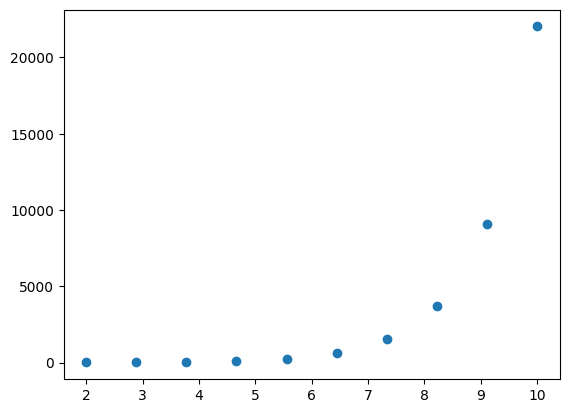

In [13]:
plt.plot(xd, yd, 'o')

In [14]:
xi = np.linspace(min(xd), max(xd), 200)
ym = f(xi)

_______

In [15]:
yl = it.interp_lagrange(xi, xd, yd)
yn = it.interp_newton(xi, xd, yd)

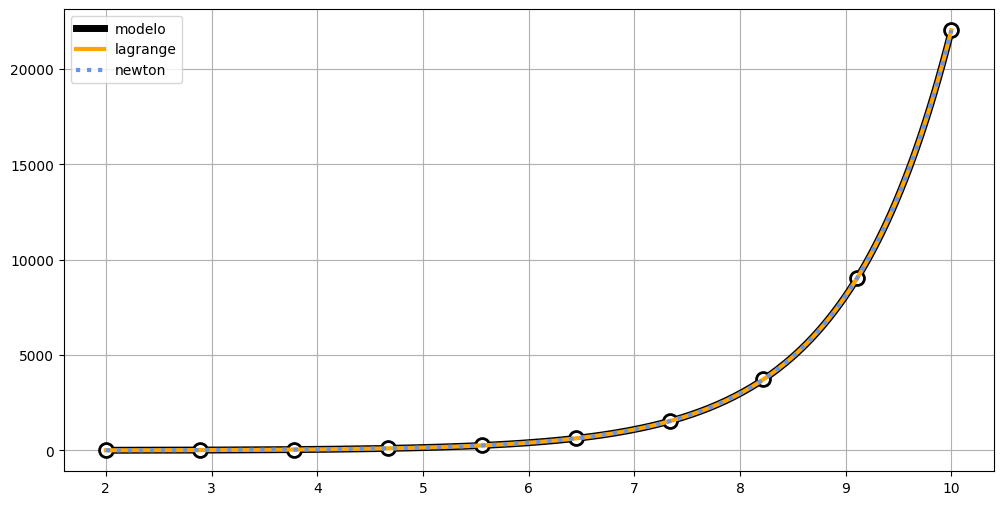

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(xi, ym, '-', linewidth=5, color='k', label='modelo')
ax.plot(xd, yd, linestyle='None', marker='o', mfc='white', mec='k', mew=2, markersize=10)

ax.plot(xi, yl, linewidth=3, linestyle='-', color='orange', label='lagrange')
ax.plot(xi, yn, linewidth=3, linestyle=':', color='cornflowerblue',  label='newton')
#ax.plot(xd, yd, marker='o', linestyle='None', color='navy', markersize=5)
#ax.set_ylim(-1000, 1000)
ax.grid()
ax.legend()

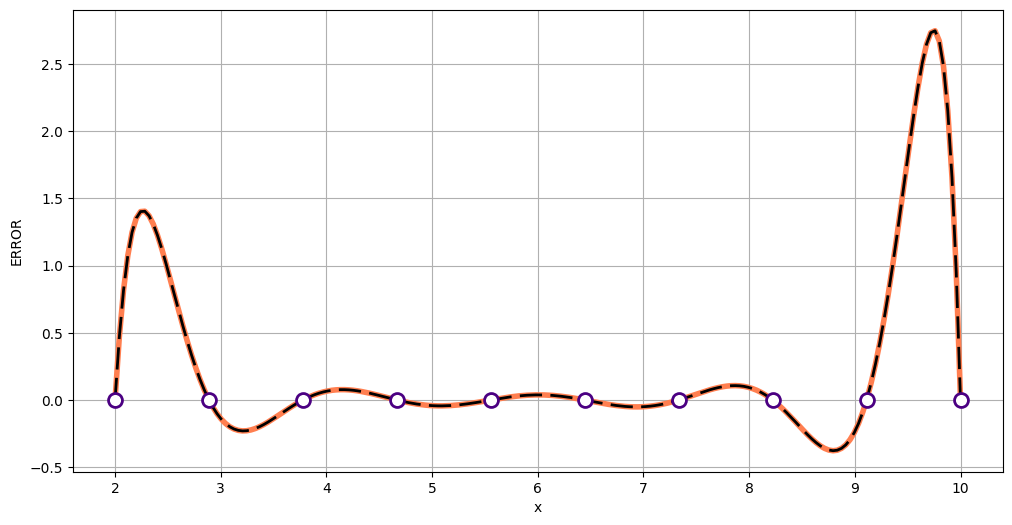

In [46]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(xi, yl-ym, linewidth=4, color='coral')
ax.plot(xi, yn-ym, linewidth=2, color='k', dashes=(8, 3))


ax.plot(xd, [0]*len(xd), marker='o', linestyle='None', color='navy',
        markersize=10, mfc='white', mec='indigo', mew=2)
ax.set_ylabel('ERROR')
#ax.set_xlim(5, 7)
#ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.grid()

Veamos juntos los errores para diferentes N

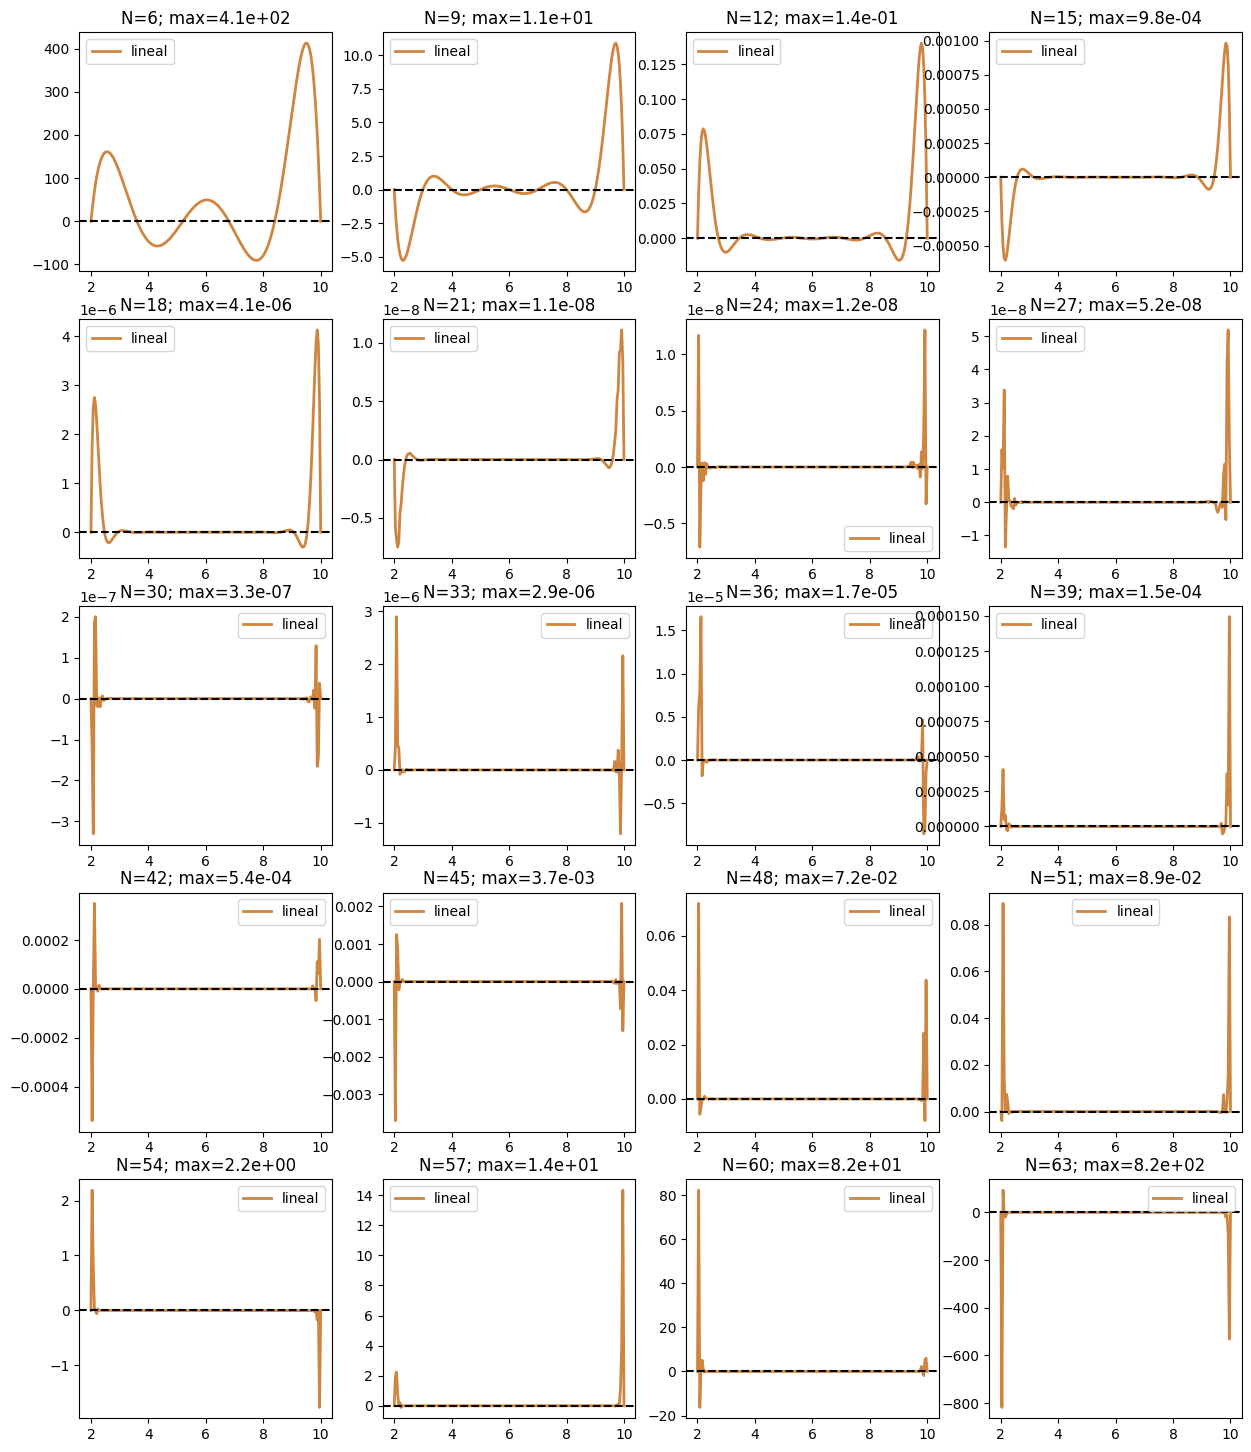

In [54]:
fig, axs = plt.subplots(5, 4, figsize=[15, 18])

for N, ax in zip(range(6, 66, 3), axs.flat):

    # DATOS
    xd = np.linspace(2, 10, N)
    yd = f(xd)

    # FUNCION
    xi = np.linspace(min(xd), max(xd), 200)
    ym = f(xi)
            
    # Error del polinomio de Lagrange
    ylgg = it.interp_lagrange(xi, xd, yd)
    mx = max(abs(ylgg-ym))
    ax.plot(xi, ylgg-ym, linewidth=2, color='peru', label='lineal')

    # # Error del Spline lineal
    # ylin = np.interp(xi, xd, yd)
    # ax.plot(xi, ylin-ym, linewidth=2, color='peru', label='lineal')

    # # Error del spline cúbico
    # spline = interp1d(xd, yd, kind='cubic')
    # ysp3 = spline(xi)
    # ax.plot(xi, ysp3-ym, linewidth=2, color='mediumaquamarine', linestyle=':', label='cubic spline')
    
    ax.set_title(f'N={N}; max={mx:5.1e}')
    ax.legend()
    ax.axhline(0, linestyle='--', color='k')

## Estategias de partición del intervalo

Text(0, 0.5, 'y')

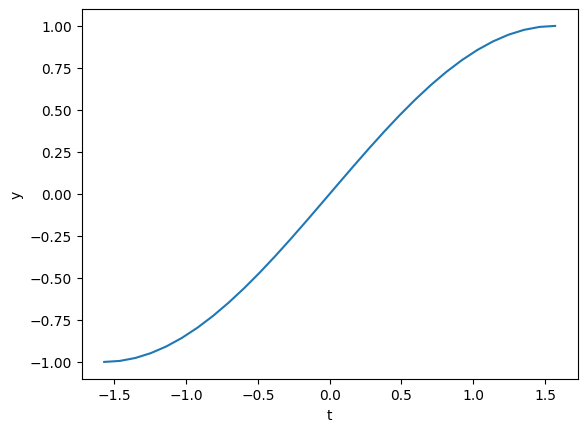

In [57]:
N = 30
t = np.linspace(-np.pi/2, np.pi/2, N)
y= np.sin(t)

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

Text(0, 0.5, 'y')

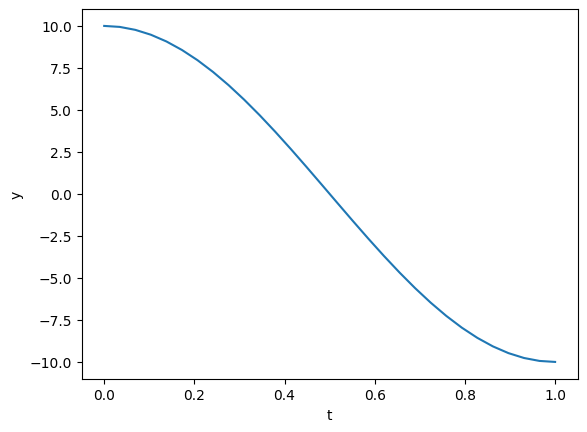

In [58]:
N = 30
t = np.linspace(0, 1, N)
y = np.cos(t*np.pi)

a = 10
b = 30

y = y * (b-a)/2

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

Text(0, 0.5, 'y')

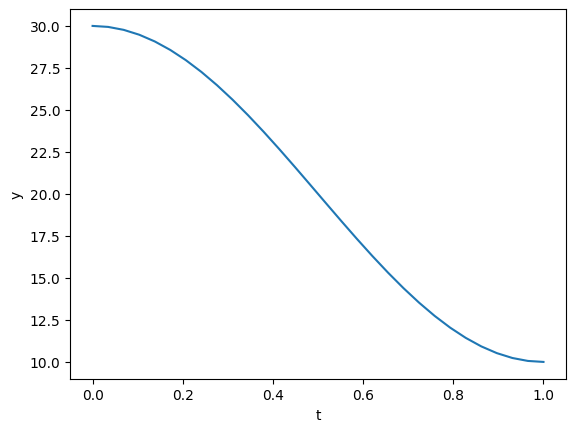

In [59]:
N = 30
t = np.linspace(0, 1, N)
y = np.cos(t*np.pi)

a = 10
b = 30

y = y * (b-a)/2 + (a+b)/2

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

In [60]:
def chebyschev(a, b, N):
    t = np.linspace(-1, 1, N)*np.pi/2
    y = np.sin(t)    
    y = (a+b)/2 + (b-a)/2 * y
    return y

In [61]:
N=20
a=10
b=30

In [62]:
x = chebyschev(a, b, N)

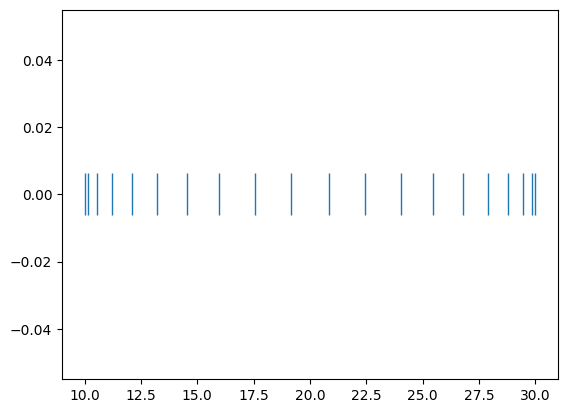

In [66]:
plt.plot(x, [0]*N, '|', markersize=30)

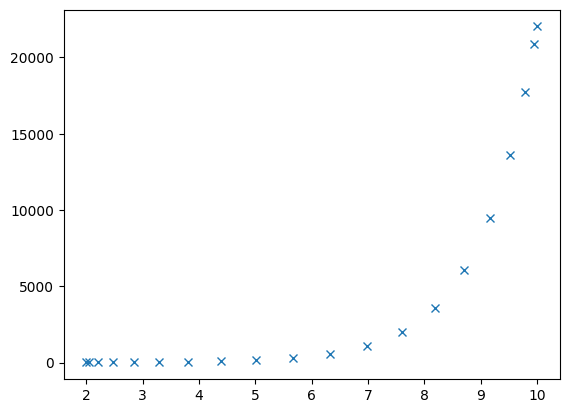

In [71]:
N = 20
xd = chebyschev(2, 10, N)
yd = f(xd)

plt.plot(xd, yd, 'x')

In [72]:
xi = np.linspace(min(xd), max(xd), 200)
ym = f(xi)

_______

In [73]:
yl = it.interp_lagrange(xi, xd, yd)
yn = it.interp_newton(xi, xd, yd)

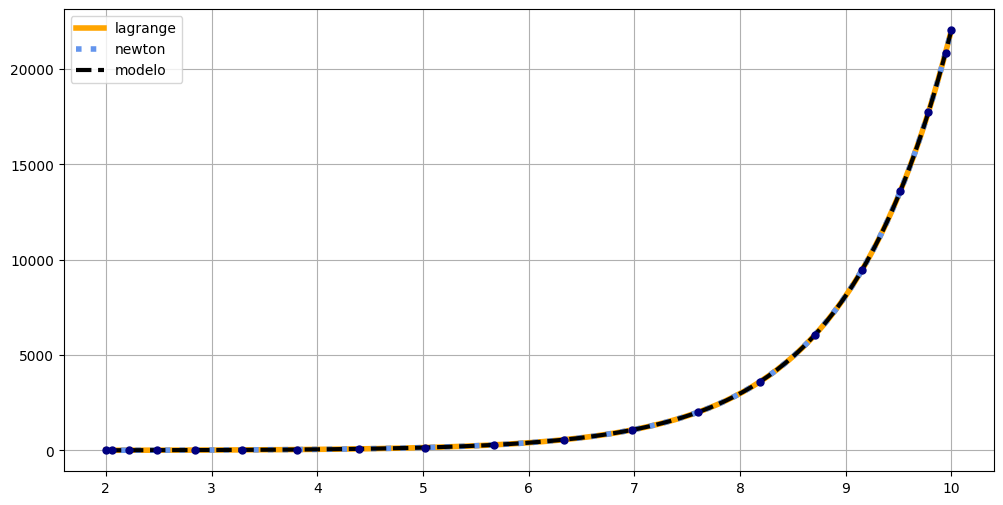

In [74]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(xi, yl, linewidth=4, linestyle='-', color='orange', 
        label='lagrange')
ax.plot(xi, yn, linewidth=4, linestyle=':', color='cornflowerblue', 
        label='newton')
ax.plot(xi, ym, '--', linewidth=3, color='k', label='modelo')
ax.plot(xd, yd, marker='o', linestyle='None', color='navy', markersize=5)
#ax.set_ylim(-1000, 1000)
ax.grid()
ax.legend()

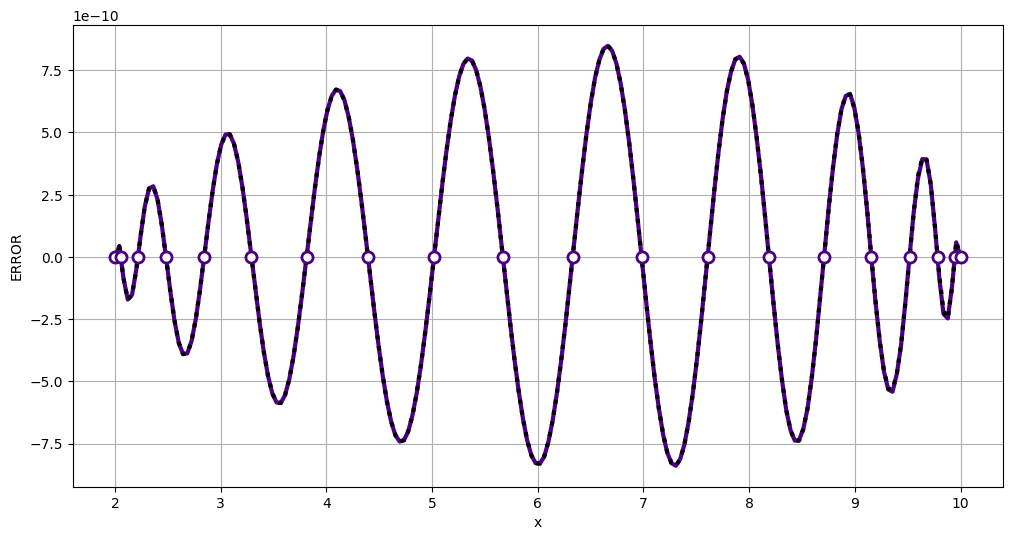

In [76]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(xi, yl-ym, linewidth=3, color='indigo')
ax.plot(xi, yn-ym, linewidth=3, color='k', linestyle=':')

ax.plot(xd, [0]*len(xd), marker='o', linestyle='None', color='navy',
        markersize=8, mfc='white', mec='indigo', mew=2)
ax.set_ylabel('ERROR')
#ax.set_xlim(5, 7)
#ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.grid()